In [70]:
import matplotlib.pyplot as plt
import numpy as np

# CFAR Algorithm

In [71]:
def CFARDetector1D(data, pfa, train_size, guard_size):
    """Apply the 1D-CFAR algorithm to detect peaks in the given data.

    Args:
        data (ndarray): The 1D input data to search for peaks.
        pfa (float): The probability of false alarm.
        train_size (int): Number of training cells (one side).
        guard_size (int): Number of guarding cells (one side).

    Returns:
        out: list of thresholds
    """
    win = train_size + guard_size

    N = train_size * 2
    threshold_factor = N * (np.power(pfa, -1/N) - 1)

    # Output data
    out = []

    # Slide the window across the data and compare the central cell to the
    # mean of the surrounding training cells
    for i in range(win, len(data) - win):
        # Compute the indices of the training cells
        training_indices = np.concatenate(
            (np.arange(i - win, i - guard_size),
                np.arange(i + guard_size + 1, i + win + 1)))

        # Extract the training cells
        training_cells = data[training_indices]

        # Compute the noise power estimate
        Pn = np.mean(training_cells)

        # Compute the detection threshold
        threshold = threshold_factor * Pn
        
        # Append threshold to out
        out.append(threshold)

    return out

# Create sample data

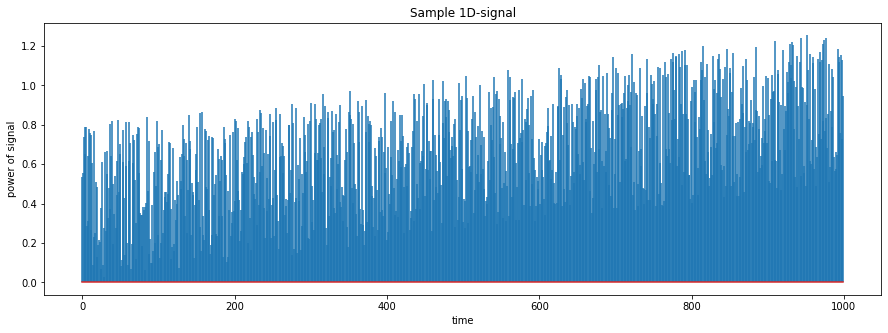

In [72]:
# Create a sample data
N = 1000 # number of timestamps
X = np.arange(N)
data = 0.0005 * X + np.random.rand(N) * 0.8
plt.figure(figsize=(15, 5))
# plt.ylim([0, 1])
plt.stem(data, markerfmt=' ')
plt.title("Sample 1D-signal")
plt.xlabel("time")
plt.ylabel("power of signal")
plt.show()

# Add some peaks to sample data

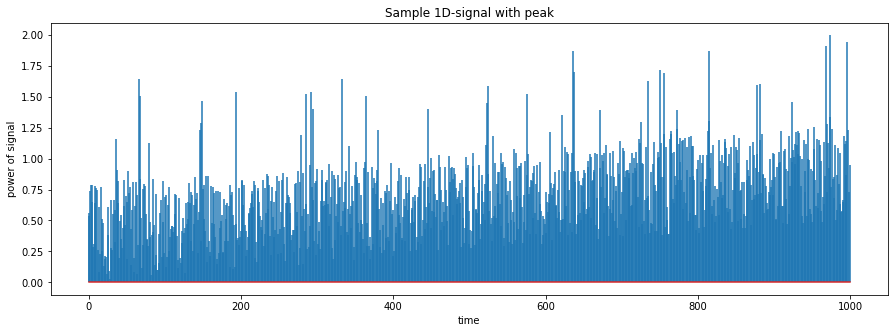

In [73]:
def gaussian_kernel(size, sigma):
    # create a one-dimensional array of size 'size'
    x = np.arange(-(size//2), size//2 + 1, 1)
    
    # calculate the Gaussian distribution
    kernel = np.exp(-np.power(x, 2) / (2 * np.power(sigma, 2)))
    
    # normalize the kernel
    kernel = kernel / np.sum(kernel)
    
    return kernel

# Add some peaks
kernel = gaussian_kernel(5, 0.5)
pos = np.random.randint(0, N-5, size=40)
for j in pos:
    data[j:j+5]+= kernel
plt.figure(figsize=(15, 5))
plt.title("Sample 1D-signal with peak")
plt.stem(data, markerfmt=' ')
plt.xlabel("time")
plt.ylabel("power of signal")
plt.xlabel("time")
plt.ylabel("power of signal")
plt.show()

# Apply CFAR Detector

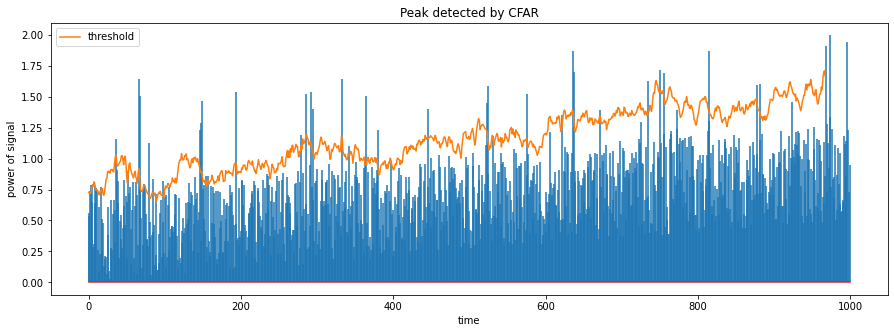

In [74]:
# Apply 1D CFAR Detector
out = CFARDetector1D(data, 0.2, 15, 1)
plt.figure(figsize=(15, 5))
plt.title("Peak detected by CFAR")
plt.stem(data, markerfmt=' ')
plt.plot(out, label='threshold')
plt.xlabel("time")
plt.ylabel("power of signal")
plt.legend()
plt.show()